### Introduction: "Large Language Models"  

#### **1. Evolution to Large Language Models (LLMs)**  
- **From Task-Specific to General-Purpose Models**:  
  - Early NLP systems relied on **task-specific architectures** (e.g., n-grams, RNNs).  
  - Transformers (Chapter 9) enabled **scalable, general-purpose models** trained on massive text corpora, leading to the rise of LLMs like GPT, BERT, and T5.  

- **Scale as a Catalyst**:  
  - **Data**: LLMs are trained on **trillions of tokens** from diverse sources (books, web text, code).  
  - **Parameters**: Model sizes range from hundreds of millions (BERT) to hundreds of billions (GPT-4) of parameters.  
  - **Compute**: Training leverages **GPU/TPU clusters**, enabling unprecedented parallelism.  

---

#### **2. Core Concepts in LLM Pretraining**  
1. **Self-Supervised Learning**:  
   - LLMs learn by predicting masked tokens (BERT) or next tokens (GPT) in unlabeled text, eliminating the need for manual annotation.  
2. **Emergent Abilities**:  
   - At scale, LLMs exhibit **few-shot learning**, **reasoning**, and **in-context adaptation** without explicit fine-tuning.  
3. **Architectural Foundations**:  
   - **Autoregressive Models** (e.g., GPT): Generate text left-to-right using causal attention masks.  
   - **Bidirectional Models** (e.g., BERT): Masked language modeling captures context from both directions.  

---

#### **3. Impact and Applications**  
- **Versatility**: LLMs power diverse applications:  
  - **Text Generation** (dialogue, stories, code).  
  - **Information Retrieval** (question answering, summarization).  
  - **Multimodal Tasks** (text-to-image, text-to-speech).  
- **Democratization**: Open-source models (e.g., LLaMA, Mistral) and APIs (e.g., ChatGPT) make LLMs accessible to developers and researchers.  

---

#### **4. Challenges and Considerations**  
- **Computational Costs**: Training LLMs requires massive infrastructure (e.g., months on thousands of GPUs).  
- **Ethical Risks**:  
  - **Bias**: Models may perpetuate harmful stereotypes from training data.  
  - **Misinformation**: Potential for generating plausible but false content.  
  - **Environmental Impact**: High energy consumption during training/inference.  


### 10.1 Foundations of Large Language Models (LLMs)

#### **1. Architectural Scaling**  
- **Transformer Enhancements**:  
  - LLMs scale the core Transformer architecture (Chapter 9) by increasing **depth** (stacking more layers, e.g., 96+), **width** (larger hidden dimensions), and **attention heads** (e.g., 64–128 heads).  
  - Example: GPT-3 uses 96 Transformer layers with 12,288-dimensional hidden states.  
- **Efficiency Optimizations**:  
  - **Sparse Attention**: Reduces computational complexity for long sequences (e.g., restricting attention to local windows).  
  - **Mixed Precision Training**: Uses 16-bit or 8-bit floating-point numbers to speed up computation and reduce memory usage.  

---

#### **2. Data Scaling and Pretraining**  
- **Massive Datasets**:  
  - LLMs train on **trillions of tokens** from diverse sources (books, web text, code, scientific papers).  
  - Datasets are carefully filtered to remove low-quality or harmful content.  
- **Tokenization**:  
  - Subword tokenization (e.g., BPE, SentencePiece) balances vocabulary size and out-of-vocabulary robustness.  
  - Vocabulary sizes range from 50k to 500k tokens, depending on the model.  

---

#### **3. Scaling Laws**  
- **Compute-Optimal Training**:  
  - **Chinchilla Laws** (Hoffmann et al., 2022): For a fixed compute budget, model size and training data should scale proportionally. For example, doubling model parameters requires doubling training tokens.  
  - **Emergent Abilities**: Larger models exhibit unforeseen capabilities (e.g., arithmetic, code generation) not present in smaller variants.  
- **Performance Trends**:  
  - Model performance improves predictably with increases in **model size**, **data volume**, and **training compute** (power-law relationships).  

---

#### **4. Training Infrastructure**  
- **Hardware**:  
  - LLMs require **GPU/TPU clusters** (thousands of devices) for distributed training over weeks or months.  
  - Techniques like **model parallelism** (splitting layers across devices) and **pipeline parallelism** (splitting batches) enable scalability.  
- **Optimization**:  
  - **AdamW Optimizer**: Adapts learning rates dynamically with weight decay for regularization.  
  - **Gradient Checkpointing**: Reduces memory usage by recomputing intermediate activations during backpropagation.  

---

#### **5. Challenges and Considerations**  
- **Environmental Impact**:  
  - Training LLMs consumes massive energy (e.g., GPT-3’s carbon footprint ≈ 500 tons of CO₂).  
- **Bias and Fairness**:  
  - Training data often reflects societal biases, requiring post-hoc mitigation (e.g., debiasing filters, RLHF).  
- **Cost Barriers**:  
  - High computational and financial costs centralize LLM development in resource-rich organizations.  

---

### **Connection to Broader Context**  
- **Builds on Chapter 9**: LLMs extend the Transformer’s architecture through scaling and optimization.  
- **Sets Stage for Pretraining**: Section 10.1 underpins later sections on fine-tuning (Chapter 11) and alignment (Chapter 12).  
- **Real-World Impact**: LLMs drive advancements in chatbots (Chapter 15), translation (Chapter 13), and speech systems (Chapter 16).  

### 10.2 Sampling for LLM Generation

1. **Decoding as Autoregressive Generation**

   * **Decoding** is the process of choosing the next word to generate based on the model’s predicted probability distribution over the vocabulary.
   * When done in a left-to-right (or right-to-left) fashion, conditioning each choice on all previous choices, it’s called **autoregressive** or **causal** generation .

2. **Random Sampling and Its Limitations**

   * **Random sampling** selects each next token by drawing from the full probability distribution. Although this favors high-probability words, the long “tail” of low-probability words can lead to bizarre or incoherent outputs.&#x20;
   * **Greedy decoding**, the special case of always picking the single most likely word (the arg max), is deterministic and often yields overly generic, repetitive text .

3. **Balancing Quality and Diversity**

   * All sampling methods introduce hyperparameters that trade off **quality** (coherence, factuality) against **diversity** (creativity, variety). Emphasizing only the highest-probability words yields safe but dull text; allowing more mid-probability words increases variety but risks incoherence .

4. **Top-k Sampling**

   * **Top-k sampling** truncates the distribution to the *k* most probable tokens, renormalizes their probabilities, and samples from this reduced set.
   * When k=1, it reduces to greedy decoding; larger k increases diversity while still avoiding extremely unlikely words .

5. **Nucleus (Top-p) Sampling**

   * **Top-p (nucleus) sampling** dynamically selects the smallest set of tokens whose cumulative probability mass ≥ p, then samples from this set.
   * This adapts to context by sometimes including more candidates when the distribution is flat and fewer when it’s peaky .

6. **Temperature Sampling**

   * **Temperature** τ controls distribution “sharpness” by dividing the model’s logits by τ before the softmax:
     y=softmax(u/τ)
   * **Low temperatures** (τ<1) make the distribution peakier (more greedy), boosting top-probability tokens; **high temperatures** (τ>1) flatten the distribution, encouraging exploration of lower-probability words .

---

These three methods—top-k, top-p, and temperature sampling—are the primary levers practitioners use to shape LLM outputs for different applications, from safe generation to creative writing.


### 10.3 Pretraining Large Language Models



1. **Self-Supervised Training (10.3.1)**

   * Large language models are trained to predict the next token in text using **teacher forcing**, where at each position the model is given the true history and learns to assign high probability to the actual next word.
   * Training minimizes the **cross-entropy loss** between the model’s predicted distribution and the one-hot true next token:
     image.png.
   * This **self-supervision** requires no external labels—text itself provides the training signal.

2. **Pretraining Data and Filtering (10.3.2)**

   * Pretraining draws on **hundreds of billions of tokens** scraped from the web (e.g., Common Crawl, The Pile) and other corpora like books and Wikipedia.
   * **Quality filters** (often classifier-based) score and remove low-quality or boilerplate text; **deduplication** eliminates repeated content.
   * **Safety filters** (e.g., toxicity detectors) aim to reduce harmful or personally identifiable information, though current classifiers can introduce biases and aren’t foolproof .
   * Ethical and legal considerations include **copyright** (fair use ambiguity), **data consent** (robots.txt and ToS “no-crawl” flags), and **privacy** (residual PII in web data) .

3. **Finetuning after Pretraining (10.3.3)**

   * To specialize models for new domains or tasks (e.g., medical text, legal language), one can **continue training** (“continued pretraining”) on in-domain data, updating **all** model parameters.
   * **Parameter-efficient finetuning** freezes most weights and updates only a small subset (e.g., adapters, LoRA layers), drastically reducing compute and storage costs.
   * For **task-specific objectives** (classification, sequence labeling), models are often equipped with new heads and trained on supervised data, with either full or partial parameter updates.
   * Collectively, these steps—continued pretraining, PEFT, and supervised finetuning—are referred to as **post-training**, and enable large language models to adapt to specialized use cases .


### 10.4 Evaluating Large Language Models



1. **Perplexity**

   * Perplexity measures how well a model predicts unseen text: for a test sequence $w_{1:n}$,

    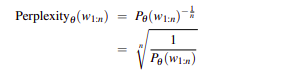
   * Lower perplexity indicates better predictive power. Since it depends on tokenization, it’s only fair to compare models using the same tokenizer .

2. **Downstream Task Accuracy**

   * Beyond intrinsic metrics like perplexity, LLMs are evaluated on concrete tasks—machine translation, summarization, question answering, speech recognition, dialogue, etc.—using task-specific metrics (e.g., BLEU, ROUGE, exact match). These evaluations gauge how improvements in the model translate into real-world performance .

3. **Efficiency & Resource Usage**

   * Model size, training and inference speed, and memory requirements are critical constraints. Evaluation often normalizes performance to a compute or memory budget.
   * Energy consumption can be directly measured (e.g., kWh or CO₂ emissions) to assess environmental and cost impacts .

4. **Fairness, Bias & Robustness**

   * LLMs exhibit demographic and societal biases. Benchmarks such as StereoSet, RealToxicityPrompts, and BBQ measure stereotypical or toxic outputs.
   * Fairness can be formalized (e.g., Rawlsian maximin: improving the worst-off group’s performance).
   * General evaluation platforms like Dynabench and the HELM framework provide dynamic, multi-metric leaderboards for robustness and human-in-the-loop assessment .


### 10.5 Dealing with Scale



Large language models (LLMs) pose unique challenges and opportunities due to their enormous size. Section 10.5 covers three core topics: **scaling laws**, the **KV cache**, and **parameter-efficient fine-tuning**.

---

### 10.5.1 Scaling Laws

LLM performance (in terms of loss) follows empirical **power-law relationships** with three main factors:

1. **Model size (N)** – number of non-embedding parameters
2. **Dataset size (D)** – total number of training tokens
3. **Compute budget (C)** – total FLOP-days spent training

Kaplan et al. (2020) showed that, when holding two factors constant, loss $L$ scales as

$$
L(N) = \Bigl(\tfrac{N_c}{N}\Bigr)^{\alpha_N},\quad
L(D) = \Bigl(\tfrac{D_c}{D}\Bigr)^{\alpha_D},\quad
L(C) = \Bigl(\tfrac{C_c}{C}\Bigr)^{\alpha_C}.
$$

Here, $N_c,D_c,C_c$ and exponents $\alpha_N,\alpha_D,\alpha_C$ depend on architecture and data specifics, but the power-law form guides decisions like whether adding more parameters or data yields better returns on loss reduction .

A back-of-the-envelope formula for parameter count in a Transformer (ignoring biases) is

$$
N \approx 12 \times n_\text{layer} \times d^2,
$$

so GPT-3’s 175 B parameters arise from roughly 96 layers and $d\approx12{,}288$ .

---

### 10.5.2 KV Cache

During **inference**, autoregressive generation processes one token at a time. Recomputing every key and value for all prior tokens would be prohibitively expensive. Instead, models maintain a **key–value cache**:

* When a token is processed, its key and value vectors are stored (“cached”).
* For the next token, only the new query vector is computed; past keys/values are looked up rather than recomputed.

This yields constant-time per-token overhead (excluding the cost of the new token) and enables efficient long-context generation .

---

### 10.5.3 Parameter-Efficient Fine-Tuning

While full fine-tuning updates all model weights, **parameter-efficient methods** (e.g., adapters, LoRA) freeze the bulk of the pretrained parameters and train only small, added modules. This reduces:

* **Compute**: far fewer parameters to update
* **Storage**: only the small adapters need to be saved per task
* **Data requirements**: often works well with limited task-specific data

These approaches enable task specialization without the expense of full-model finetuning.

---

Together, scaling laws inform *whether* to grow models or data, KV caching makes *inference* tractable at scale, and parameter-efficient fine-tuning makes *adaptation* affordable.


### 10.6 – Potential Harms from Language Models



Large pretrained neural language models carry forward—and often amplify—a range of risks first noted for simpler NLP systems (e.g., in Chapters 4 and 6). These harms become especially acute whenever models generate text, whether in chatbots, summarizers, translation systems, or autocomplete. Key categories include:

1. **Hallucinations (Factual Errors)**
   LLMs optimize for *predictability* and *fluency*, not truth. As a result, they frequently produce plausible-sounding but incorrect “facts,” a phenomenon known as **hallucination**. For any application demanding factual reliability—legal advice, medical guidance, news summarization—hallucinations pose a severe danger .

2. **Toxicity and Stereotyping**
   Even benign prompts can elicit hate speech, slurs, or abusive language. Gehman et al. (2020) demonstrated that LLMs trained on web-scraped data can output toxic content or reinforce negative stereotypes about demographic groups, including subtle biases in sentiment or portrayal . Subsequent work (Cheng et al., 2023; Sheng et al., 2019) confirms these models perpetuate—and sometimes intensify—societal biases.

3. **Data Biases and Amplification**

   * **Source Bias:** Pretraining corpora disproportionately reflect text produced in developed countries, skewing generational perspectives toward those regions.
   * **Amplification:** LLMs not only mirror but *exaggerate* biases present in their training data—much as embedding models do (see Chapter 6). For instance, toxic or stereotyped usage in a small subset of the data can become far more prevalent in generated text .

4. **Privacy and Data Leakage**
   Web-scraped datasets often include personally identifiable information—names, phone numbers, addresses—that models can inadvertently memorize. Adversaries have demonstrated successful extraction of such data from model parameters, a risk magnified when models are trained on sensitive records like electronic health information .

5. **Misinformation & Malicious Use**
   Beyond unintentional errors, LLMs serve as potent tools for generating convincing misinformation, phishing messages, extremist propaganda, and other malicious content. McGuffie & Newhouse (2020) show how LLMs can emulate extremist rhetoric, aiding radicalization efforts .

6. **Copyright & Legal Concerns**
   Training on massive web-scrapes raises thorny questions around copyright infringement and data consent. Although “fair use” provides some latitude, the legal status of large-scale web data remains unsettled, and sensitive or restricted content may slip through filtering processes (see Section 10.3.2).

7. **Regulatory and Ethical Transparency**
   As awareness of these harms grows, so do calls for **datasheets** and **model cards**—standardized documentation detailing training corpora, filtering methods, known biases, intended uses, and evaluation results. Such transparency aids both users and regulators in assessing model risks and compliance, and is increasingly mandated by emerging legislation .

---

*Taken together, these risks underscore the need for rigorous mitigation strategies—data curation and filtering, bias audits, retrieval-augmented architectures (to anchor generation in trusted sources), differential privacy techniques, and transparent documentation—before deploying LLMs in real-world settings.*
